In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdf
%matplotlib inline

# 単独株式の価格とリターンのシミュレーション

時刻tにおける株式リターン：
$
r_t = \mu  \Delta t + \sigma \sqrt{\Delta t}Z 
$

時刻tにおける株価：
$
S_t = S_{t-1} \exp(\mu \Delta t + \sigma\sqrt{\Delta t}Z)
$

を利用しシミュレーションを行う

### 時刻tにおける株式リターンを計算する関数作成

In [21]:
def sim_return(mu, delta_t, sigma, Z):
    r = mu * delta_t + sigma*np.sqrt(delta_t) * Z
    return r

### 変数の定義

In [2]:
#平均μ
mu = 0.12
#標準偏差σ
sigma = 0.3
#Δt
delta_t = 0.0833
#当初価格
p_t0 = 12

In [12]:
months = np.arange(1, 13)
prices = np.zeros(12)
prices[0] = p_t0
Z = np.random.randn(12)

### 計算

In [13]:
for i in range(1,12):
    prices[i] = prices[i-1] * np.exp(mu*delta_t+sigma*np.sqrt(delta_t)*Z[i])

In [14]:
df = pd.DataFrame({"価格":prices}, index=months)

In [15]:
df

,価格
1,12.000000
2,12.117124
3,9.262696
4,9.411133
5,9.936272
6,9.690880
7,8.268580
8,8.092452
9,9.171142
10,10.396735


# 27.3二つの株式のポートフォリオ
$
Z_2 = \rho Z_1 + \sqrt{1-\rho^2}Z_3
$
の時、標準正規乱数$Z_1$と$Z_2$は相関$\rho$を持つことを利用する。

### 時刻tにおける株式リターンを計算する関数作成

In [7]:
def sim_return(mu, delta_t, sigma, Z):
    r = mu * delta_t + sigma*np.sqrt(delta_t) * Z
    return r

### 変数の定義

In [8]:
#株式１、２の平均μ
mu1 = 0.12
mu2 = 0.15
#株式１、２の標準偏差σ
sigma1 = 0.22
sigma2 = 0.3
#相関係数ρ
rho = 0.5
#月次リターン 1/12 = 0.0833
delta_t = 0.0833

### 乱数作成

In [22]:
Z1 = np.random.randn(12)
Z3 = np.random.randn(12)
Z2 = rho * Z1 + np.sqrt(1-rho**2)*Z3

### 計算

In [23]:
returns1 = np.zeros(12)
returns2 = np.zeros(12)
months = np.arange(1,13)

for i in range(12):
    returns1[i] = sim_return(mu1, delta_t, sigma1, Z1[i])
    returns2[i] = sim_return(mu2, delta_t, sigma2, Z2[i])

In [24]:
df = pd.DataFrame({"株式1のリターン":returns1, "株式2のリターン":returns2, "Z1":Z1, "Z2":Z2}, index=months)

In [25]:
df

,株式1のリターン,株式2のリターン,Z1,Z2
1,-0.028090,0.083914,-0.599822,0.824839
2,0.084823,-0.140322,1.178450,-1.764937
3,0.071709,-0.010487,0.971922,-0.265426
4,0.082291,0.142596,1.138580,1.502579
5,0.007564,-0.025387,-0.038307,-0.437517
6,0.033727,0.028457,0.373748,0.184345
7,-0.005583,-0.047243,-0.245353,-0.689931
8,-0.033744,-0.055345,-0.688872,-0.783507
9,0.063410,0.099306,0.841227,1.002613
10,0.049775,-0.043732,0.626475,-0.649382


### ポートフォリオのシミュレーション

In [29]:
#初期条件
assets0 = 10000
stock1_ratio = 0.25

#上のシミュレーションに基づく結果
#期間末の価値
assets_after = assets0*stock1_ratio*np.exp(df["株式1のリターン"].sum()) + assets0*(1-stock1_ratio)*np.exp(df["株式2のリターン"].sum())
#期待リターン
expected_return = stock1_ratio*mu1 + (1-stock1_ratio)*mu2
#実際のリターン
real_return = np.log(assets_after/assets0)
#リターンの標準偏差
std_return = np.sqrt((stock1_ratio**2)*(sigma1**2) + 2*stock1_ratio*(1-stock1_ratio)*rho*sigma1*sigma2 + ((1-stock1_ratio)**2)*(sigma2**2))

print("期間末の価値： ",assets_after)
print("期待リターン: ",expected_return)
print("実際のリターン: ",real_return)
print("リターンの標準偏差: ",std_return)


期間末の価値：  12930.395752841438
期待リターン:  0.1425
実際のリターン:  0.25699570665631677
リターンの標準偏差:  0.25695330315059195


# 27.4無リスク資産を加える
前節のデータに無リスク資産を加えて、２つのリスキーな株式と無リスク資産からなるポートフォリオのシミュレーションを行う

##### 以下、前節のコピー

In [43]:
def sim_return(mu, delta_t, sigma, Z):
    r = mu * delta_t + sigma*np.sqrt(delta_t) * Z
    return r

#株式１、２の平均μ
mu1 = 0.12
mu2 = 0.15
#株式１、２の標準偏差σ
sigma1 = 0.22
sigma2 = 0.3
#相関係数ρ
rho = 0.5
#月次リターン 1/12 = 0.0833
delta_t = 0.0833

Z1 = np.random.randn(12)
Z3 = np.random.randn(12)
Z2 = rho * Z1 + np.sqrt(1-rho**2)*Z3

returns1 = np.zeros(12)
returns2 = np.zeros(12)
months = np.arange(1,13)

for i in range(12):
    returns1[i] = sim_return(mu1, delta_t, sigma1, Z1[i])
    returns2[i] = sim_return(mu2, delta_t, sigma2, Z2[i])

df_risk = pd.DataFrame({"株式1のリターン":returns1, "株式2のリターン":returns2, "Z1":Z1, "Z2":Z2}, index=months)

In [44]:
df_risk

,株式1のリターン,株式2のリターン,Z1,Z2
1,0.053370,-0.036884,0.683104,-0.570294
2,0.065955,-0.004651,0.881303,-0.198022
3,0.036228,0.051758,0.413133,0.453464
4,0.003002,-0.101561,-0.110144,-1.317265
5,-0.033591,0.053811,-0.686448,0.477172
6,0.029475,0.081997,0.306783,0.802706
7,0.063446,0.103092,0.841794,1.046339
8,0.058288,-0.018761,0.760556,-0.360985
9,0.071033,0.105157,0.961277,1.070183
10,0.056262,-0.047297,0.728646,-0.690559


### リスク資産のみでのポートフォリオ

In [45]:
#初期条件
stock1_ratio = 0.25 #株式１の割合

#期待リターン
expected_return_risk = stock1_ratio*mu1 + (1-stock1_ratio)*mu2
#実際のリターン
real_return_risk = np.log(assets_after/assets0)
#リターンの予測標準偏差
expected_std_risk = np.sqrt((stock1_ratio**2)*(sigma1**2) + 2*stock1_ratio*(1-stock1_ratio)*rho*sigma1*sigma2 + ((1-stock1_ratio)**2)*(sigma2**2))



### 無リスク資産を加えたポートフォリオ

In [46]:
#初期条件
nonrisk_ratio = 0.6 #無リスク資産の割合
rf = 0.03  #無リスク金利

In [47]:
df_portfolio = df_risk
df_portfolio["無リスク資産のリターン"]=rf
df_portfolio["ポートフォリオのリターン"] = (df_portfolio["株式1のリターン"]*stock1_ratio + df_portfolio["株式2のリターン"]*(1-stock1_ratio))*(1-nonrisk_ratio) + df_portfolio["無リスク資産のリターン"]*nonrisk_ratio

In [48]:
df_portfolio

,株式1のリターン,株式2のリターン,Z1,Z2,無リスク資産のリターン,ポートフォリオのリターン
1,0.053370,-0.036884,0.683104,-0.570294,0.03,0.012272
2,0.065955,-0.004651,0.881303,-0.198022,0.03,0.023200
3,0.036228,0.051758,0.413133,0.453464,0.03,0.037150
4,0.003002,-0.101561,-0.110144,-1.317265,0.03,-0.012168
5,-0.033591,0.053811,-0.686448,0.477172,0.03,0.030784
6,0.029475,0.081997,0.306783,0.802706,0.03,0.045547
7,0.063446,0.103092,0.841794,1.046339,0.03,0.055272
8,0.058288,-0.018761,0.760556,-0.360985,0.03,0.018201
9,0.071033,0.105157,0.961277,1.070183,0.03,0.056650
10,0.056262,-0.047297,0.728646,-0.690559,0.03,0.009437


In [49]:
#期待リターン
expected_return = nonrisk_ratio*rf + (1-nonrisk_ratio)*expected_return_risk
#実際のリターン
real_return = df_portfolio["ポートフォリオのリターン"].sum()
#リターンの予測標準偏差
expected_std = (1-nonrisk_ratio) * expected_std_risk
#リターンの実際の標準偏差
std = df_portfolio["ポートフォリオのリターン"].std() * np.sqrt(12) / np.sqrt(11)

print("期待リターン： ",expected_return)
print("実際のリターン: ",real_return)
print("リターンの予測標準偏差:", expected_std)
print("リターンの実際の標準偏差: ",std)

期待リターン：  0.075
実際のリターン:  0.35088320796773714
リターンの予測標準偏差: 0.10278132126023679
リターンの実際の標準偏差:  0.02925607244830908


# 27.7ベータとリターン
以下の数式を用いて$\alpha$, $\beta$, $R^2$の理論値と実際の値とを求める

$$
\beta_i = \frac{Cov(r_i,r_M)}{Var(r_M)} = \frac{\rho \sigma_1 \sigma_M}{\sigma_m^2} = \frac{\rho \sigma_i}{\sigma_M}
$$

$$
\begin{align*}
r_{i,t} = \alpha_i + \beta_i r_{Mt}
\end{align*}
$$

$$
\begin{align*}
&\alpha_i = E(r_M) - \beta_i E(r_i)\\
&\beta_i = \frac{\rho \sigma_i}{\sigma_M}\\   
&R^2 = \rho ^2\\
\end{align*}
$$

In [6]:
from sklearn.linear_model import LinearRegression
#初期設定
mu_i = 0.06 #株式iの平均
sigma_i = 0.22 #株式iの標準偏差
mu_m = 0.1#マーケットの平均
sigma_m = 0.15 #マーケットの標準偏差
rho = 0.3 #iとMの相関

In [5]:
#予想beta
betai_est = rho * sigma_i / sigme_m
#予想alpha
alphai_est = mu_i - betai_est*mu_m
#予想R^2
R2_est = rho**2

In [40]:
#乱数発生(27.3参照)
Z1 = np.random.randn(60)
Z3 = np.random.randn(60)
Z2 = rho * Z1 + np.sqrt(1-rho**2)*Z3
ret = mu_i + sigma_i*Z1*np.sqrt(1/12)
market = mu_m + sigma_m*Z2*np.sqrt(1/12)

df = pd.DataFrame({"Z1":Z1,
                  "Z2":Z2,
                  "return":ret,
                  "market":market},
                 index = range(1,61))

In [41]:
#df

In [42]:
model = LinearRegression()
model.fit(ret.reshape([-1,1]),market)
alphai = model.intercept_
betai = model.coef_[0]
R2 = model.score(ret.reshape([-1,1]),market)

In [43]:
print("αの予想値: ", alphai_est,"  実際のα: ", alphai)
print("βの予想値: ", betai_est, "  実際のβ: ",betai)
print("R^2の予想値: ", R2_est, "  実際のR^2: ", R2)

αの予想値:  0.015999999999999986   実際のα:  0.0803873100252558
βの予想値:  0.44000000000000006   実際のβ:  0.2924086778516175
R^2の予想値:  0.09   実際のR^2:  0.2137267480173688


実行するたびに実際の値が変わる。理論値と近いこともあれば、全く離れていることもある。

### シミュレーションを50回行う

In [75]:
betas = []
for i in range(50):
    Z1 = np.random.randn(60)
    Z3 = np.random.randn(60)
    Z2 = rho * Z1 + np.sqrt(1-rho**2)*Z3
    ret = mu_i + sigma_i*Z1*np.sqrt(1/12)
    market = mu_m + sigma_m*Z2*np.sqrt(1/12)
    model.fit(ret.reshape([-1,1]),market)
    #alphai = model.intercept_
    betai = model.coef_[0]
    #R2 = model.score(ret.reshape([-1,1]),market)
    betas.append(betai)

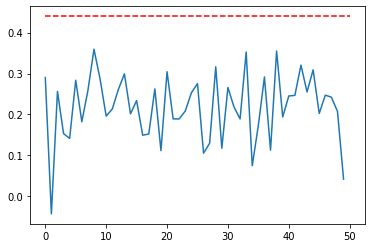

In [76]:
plt.plot(betas)
plt.hlines([betai_est],0,50,color="red",linestyle="dashed")